In [14]:
# Set up
import pandas as pd
import seaborn as sns
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Import data
major = pd.read_csv('./data/degrees-that-pay-back.csv')
college_type = pd.read_csv('./data/salaries-by-college-type.csv')
college_region = pd.read_csv('./data/salaries-by-region.csv')
college_ranking = pd.read_csv('./data/national-universities-rankings.csv')

## Dataset Overview

In [2]:
# Understand the dataset 
college_type.describe()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,269,269,269,269,231,269,269,231
unique,249,5,145,168,141,178,110,98
top,University of Florida (UF),State,"$42,600.00","$72,100.00","$40,100.00","$54,100.00","$106,000.00","$150,000.00"
freq,2,175,7,5,6,6,11,8


In [3]:
# Understand the dataset 
college_region.describe()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,320,320,320,320,273,320,320,273
unique,320,5,168,204,166,217,130,115
top,Black Hills State University,Northeastern,"$42,600.00","$72,100.00","$43,300.00","$62,400.00","$117,000.00","$150,000.00"
freq,1,100,6,5,5,5,10,10


In [4]:
# Understand the dataset 
college_ranking.describe()

,rank,undergrad_enrollment
count,231.000000,231.000000
mean,113.982684,14946.619048
std,65.995518,10569.664095
min,1.000000,1001.000000
25%,56.000000,6238.500000
50%,111.000000,12949.000000
75%,171.000000,22145.500000
max,220.000000,54513.000000


As we can see above, the number of schools are varies in different data set. For the college type dataset, when a college is with more than 1 type, there will more than 1 row to present the college type. Here are all the colleges that are with multiple types:

In [5]:
# the school with the duplicated types
college_type['is_duplicated'] = college_type.duplicated(["School Name"])
college_type_dup = college_type.loc[college_type['is_duplicated'] == True]
college_type_dup.describe()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,is_duplicated
count,20,20,20,20,19,20,20,19,20
unique,20,2,20,19,19,19,14,18,1
top,Randolph-Macon College,State,"$41,300.00","$95,000.00","$43,700.00","$52,800.00","$106,000.00","$163,000.00",True
freq,1,19,1,2,1,2,3,2,20


In [6]:
college_region.describe()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,320,320,320,320,273,320,320,273
unique,320,5,168,204,166,217,130,115
top,Black Hills State University,Northeastern,"$42,600.00","$72,100.00","$43,300.00","$62,400.00","$117,000.00","$150,000.00"
freq,1,100,6,5,5,5,10,10


In [7]:
college_ranking.describe()

,rank,undergrad_enrollment
count,231.000000,231.000000
mean,113.982684,14946.619048
std,65.995518,10569.664095
min,1.000000,1001.000000
25%,56.000000,6238.500000
50%,111.000000,12949.000000
75%,171.000000,22145.500000
max,220.000000,54513.000000


# Merge

In [8]:
school_type = college_type[['School Name', 'School Type']]
all_info = pd.merge(school_type, college_region, on=['School Name', 'School Name'])

In [9]:
# all_info = pd.merge(school_type, college_region, how='outer', left_on=['School Name'], right_on = ['School Name'])
all_info['School Name'] = all_info['School Name'].str.replace(r"\((.*?)\)","").str.rstrip()
# all_info = all_info.merge(college_ranking, how='outer', left_on='School Name', right_on = 'name')
all_info = all_info.merge(college_ranking, how='outer', left_on='School Name', right_on = 'name')
all_info = all_info.loc[all_info['School Name'].notna()]
all_info

,School Name,School Type,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,name,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,Massachusetts Institute of Technology,Engineering,Northeastern,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Massachusetts Institute of Technology,"Cambridge, MA",7.0,"MIT is located in Cambridge, Massachusetts, ac...","$48,452",NaN,4527.0
1,California Institute of Technology,Engineering,California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,California Institute of Technology,"Pasadena, CA",12.0,"Caltech, which focuses on science and engineer...","$47,577",NaN,1001.0
2,Harvey Mudd College,Engineering,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,Northeastern,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cooper Union,Engineering,Northeastern,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Worcester Polytechnic Institute,Engineering,Northeastern,"$61,000.00","$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00",Worcester Polytechnic Institute,"Worcester, MA",60.0,"Among the 10 colleges located in Worcester, Ma...","$46,994",NaN,4299.0
6,Carnegie Mellon University,Engineering,Northeastern,"$61,800.00","$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00",Carnegie Mellon University,"Pittsburgh, PA",24.0,"Carnegie Mellon University, founded by industr...","$52,040",NaN,6454.0
7,Rensselaer Polytechnic Institute,Engineering,Northeastern,"$61,100.00","$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00",Rensselaer Polytechnic Institute,"Troy, NY",39.0,Rensselaer Polytechnic Institute was founded o...,"$50,797",NaN,5864.0
8,Georgia Institute of Technology,Engineering,Southern,"$58,300.00","$106,000.00","$67,200.00","$85,200.00","$137,000.00","$183,000.00",Georgia Institute of Technology,"Atlanta, GA",34.0,"Georgia Tech, located in the heart of Atlanta,...","$32,404","$12,212",15142.0
9,Colorado School of Mines,Engineering,Western,"$58,100.00","$106,000.00","$62,200.00","$87,900.00","$142,000.00","$201,000.00",Colorado School of Mines,"Golden, CO",82.0,"For students who want to work in the sciences,...","$34,828","$17,383",4608.0


In [10]:
# comm
# all_info = pd.merge(all_info, school_type, how='left', left_on=['name'], right_on = ['School Name'])
# all_info['is_duplicated'] = all_info.duplicated(["School Name"])
# all_info_dup = all_info.loc[all_info['is_duplicated'] == False]
# all_info_dup

In [11]:
all_info.isnull().sum()

School Name                            0
School Type                            0
Region                                 0
Starting Median Salary                 0
Mid-Career Median Salary               0
Mid-Career 10th Percentile Salary     44
Mid-Career 25th Percentile Salary      0
Mid-Career 75th Percentile Salary      0
Mid-Career 90th Percentile Salary     44
name                                 185
location                             185
rank                                 185
description                          185
tuition_and_fees                     185
in_state                             201
undergrad_enrollment                 185
dtype: int64

In [12]:
rank_dp = all_info.loc[all_info['rank'].notna()]
no_rank_dp = all_info.loc[all_info['rank'].isna()]
no_rank_dp = no_rank_dp[['School Name', 'School Type','Starting Median Salary', 'Mid-Career Median Salary', 
                        'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary',
                        'Mid-Career 90th Percentile Salary']]

no_rank_dp

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN
12,Wentworth Institute of Technology,Engineering,"$53,000.00","$96,700.00","$55,200.00","$74,000.00","$117,000.00","$153,000.00"
13,Virginia Polytechnic Institute and State Unive...,Engineering,"$53,500.00","$95,400.00","$50,600.00","$71,400.00","$124,000.00","$163,000.00"
14,South Dakota School of Mines & Technology,Engineering,"$55,800.00","$93,400.00","$71,500.00","$81,900.00","$122,000.00","$147,000.00"
15,New Mexico Institute of Mining and Technology,Engineering,"$51,000.00","$93,400.00",NaN,"$67,400.00","$123,000.00",NaN
18,University of Illinois at Urbana-Champaign,Party,"$52,900.00","$96,100.00","$48,200.00","$68,900.00","$132,000.00","$177,000.00"
19,University of Illinois at Urbana-Champaign,State,"$52,900.00","$96,100.00","$48,200.00","$68,900.00","$132,000.00","$177,000.00"
20,"University of Maryland, College Park",Party,"$52,000.00","$95,000.00","$50,400.00","$68,300.00","$126,000.00","$166,000.00"


Text(0,0.5,'Salary')

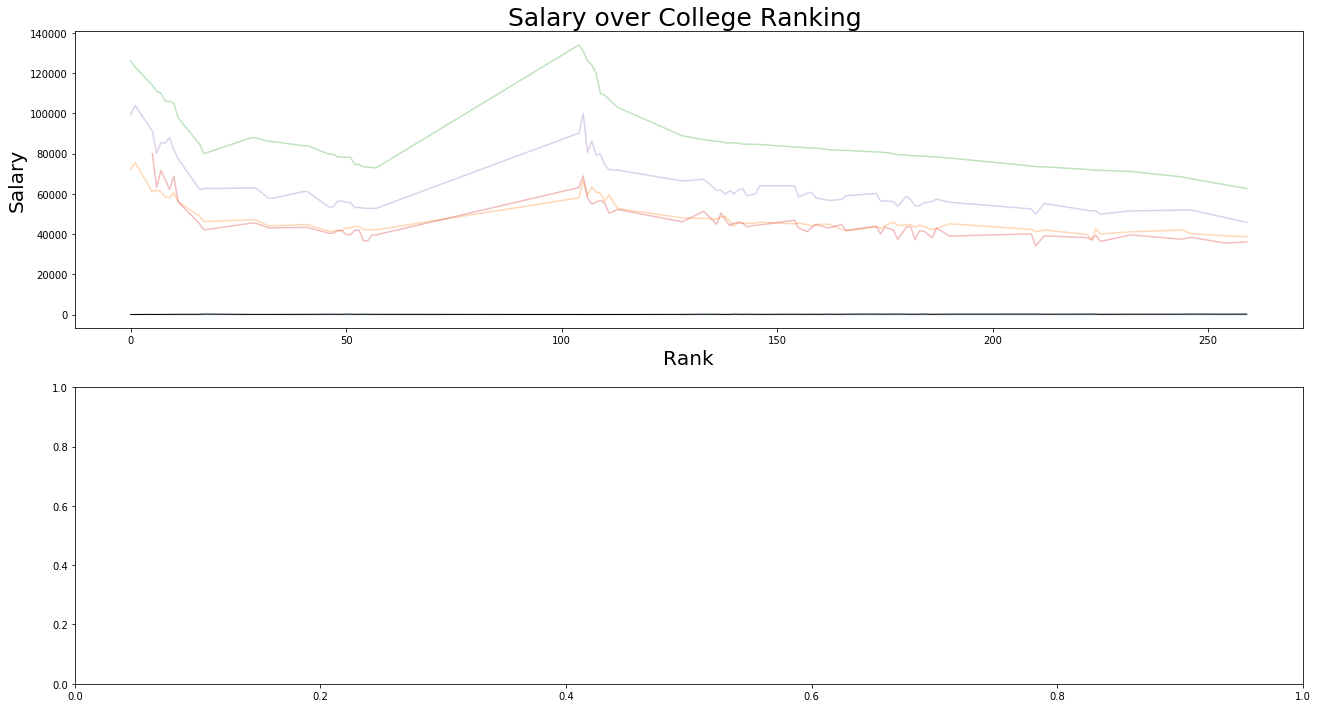

In [19]:
rank_dp = all_info.loc[all_info['rank'].notna()]

fig, ax = plt.subplots(2, 1, figsize=(22, 12))

# Annual average
plt.subplot(211)

for i in rank_dp.columns[2:7]:
    rank_dp[i].plot(alpha = .3)

rank_dp['rank'].plot(alpha = 1, c = 'k', linewidth = 1)

plt.title('Salary over College Ranking ', size = 25)
plt.xlabel('Rank', size = 20)
plt.ylabel('Salary', size = 20)

In [15]:
selected_columns = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary',
                        'Mid-Career 90th Percentile Salary', 'tuition_and_fees']

for column in selected_columns:
    all_info[column] = all_info[column].str.replace("$","")
    all_info[column] = all_info[column].str.replace(",","")
    all_info[column] = pd.to_numeric(all_info[column])

In [16]:
# School Type Encoder
label_encoder = LabelEncoder()
school_type_encode= label_encoder.fit_transform(all_info['School Type'])
all_info['School Type'] = school_type_encode
list(label_encoder.inverse_transform(all_info['School Type']))

all_info['Region'] = label_encoder.fit_transform(all_info['Region'])
list(label_encoder.inverse_transform(all_info['Region']))


all_info

/Users/zhiqilin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/zhiqilin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,School Name,School Type,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,name,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,Massachusetts Institute of Technology,0,2,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,Massachusetts Institute of Technology,"Cambridge, MA",7.0,"MIT is located in Cambridge, Massachusetts, ac...",48452.0,NaN,4527.0
1,California Institute of Technology,0,0,75500.0,123000.0,NaN,104000.0,161000.0,NaN,California Institute of Technology,"Pasadena, CA",12.0,"Caltech, which focuses on science and engineer...",47577.0,NaN,1001.0
2,Harvey Mudd College,0,0,71800.0,122000.0,NaN,96000.0,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Polytechnic University of New York, Brooklyn",0,2,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cooper Union,0,2,62200.0,114000.0,NaN,80200.0,142000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Worcester Polytechnic Institute,0,2,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0,Worcester Polytechnic Institute,"Worcester, MA",60.0,"Among the 10 colleges located in Worcester, Ma...",46994.0,NaN,4299.0
6,Carnegie Mellon University,0,2,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0,Carnegie Mellon University,"Pittsburgh, PA",24.0,"Carnegie Mellon University, founded by industr...",52040.0,NaN,6454.0
7,Rensselaer Polytechnic Institute,0,2,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0,Rensselaer Polytechnic Institute,"Troy, NY",39.0,Rensselaer Polytechnic Institute was founded o...,50797.0,NaN,5864.0
8,Georgia Institute of Technology,0,3,58300.0,106000.0,67200.0,85200.0,137000.0,183000.0,Georgia Institute of Technology,"Atlanta, GA",34.0,"Georgia Tech, located in the heart of Atlanta,...",32404.0,"$12,212",15142.0
9,Colorado School of Mines,0,4,58100.0,106000.0,62200.0,87900.0,142000.0,201000.0,Colorado School of Mines,"Golden, CO",82.0,"For students who want to work in the sciences,...",34828.0,"$17,383",4608.0


rank_dp.isnull().sum()

In [ ]:
sns.heatmap(all_info.corr()**2, cmap="YlGnBu")